In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
df = pd.read_csv("life_exp.csv")
df.head()

,Unnamed: 0,Life_Expectancy,Average_Temperature,Daily_Screen_Time,Health_Index,Income,Country,Diet_Type,Government_Health_Policy
0,0,72.483571,17.923146,4.357787,71.654576,74294.715447,Country B,Vegetarian,1.0
1,1,69.308678,22.896773,4.560785,68.748497,73109.928448,Country B,Non-Vegetarian,1.0
2,2,73.238443,23.286427,5.083051,73.985736,78248.930090,Country C,Vegetarian,1.0
3,3,77.615149,20.988614,5.053802,78.225520,82709.110470,Country C,Vegan,1.0
4,4,68.829233,24.193571,2.622331,68.808332,72929.102183,Country A,Vegetarian,1.0


In [17]:
df.describe()

,Unnamed: 0,Life_Expectancy,Average_Temperature,Daily_Screen_Time,Health_Index,Income,Government_Health_Policy
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,49.500000,69.480767,25.111523,4.064896,69.587608,74368.758472,1.0
std,29.011492,4.540842,4.768345,1.084283,4.475948,4744.899489,0.0
min,0.000000,56.901274,15.406144,0.758733,59.054457,62441.446464,1.0
25%,24.750000,66.995472,20.971697,3.344556,66.820378,70968.995974,1.0
50%,49.500000,69.365219,25.420536,4.097696,69.626849,74399.904642,1.0
75%,74.250000,72.029760,27.690852,4.704437,72.651242,78126.987900,1.0
max,99.000000,79.261391,38.600846,7.852731,79.173729,86449.739694,1.0


### Analiza odnosa Life_Expectancy, Health_Index i Income

In [7]:
df['Country'].value_counts()

Country
Country B    38
Country C    33
Country A    29
Name: count, dtype: int64

In [8]:
df['Diet_Type'].value_counts()

Diet_Type
Vegan             36
Vegetarian        34
Non-Vegetarian    30
Name: count, dtype: int64

In [11]:
###df['Income'].value_counts()

In [12]:
df.isnull().sum()

Unnamed: 0                  0
Life_Expectancy             0
Average_Temperature         0
Daily_Screen_Time           0
Health_Index                0
Income                      0
Country                     0
Diet_Type                   0
Government_Health_Policy    0
dtype: int64

In [13]:
## Korelacijska matrica

In [16]:
df.corr(numeric_only=True)

,Unnamed: 0,Life_Expectancy,Average_Temperature,Daily_Screen_Time,Health_Index,Income,Government_Health_Policy
Unnamed: 0,1.000000,0.044508,0.006198,-0.089520,0.043373,0.029239,NaN
Life_Expectancy,0.044508,1.000000,-0.136422,0.190840,0.980875,0.895932,NaN
Average_Temperature,0.006198,-0.136422,1.000000,-0.036632,-0.141879,-0.045018,NaN
Daily_Screen_Time,-0.089520,0.190840,-0.036632,1.000000,0.193556,0.135069,NaN
Health_Index,0.043373,0.980875,-0.141879,0.193556,1.000000,0.895719,NaN
Income,0.029239,0.895932,-0.045018,0.135069,0.895719,1.000000,NaN
Government_Health_Policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# min_value = df.groupby(['Country', 'Diet_Type'])['Life_Expectancy'].min()
# max_value = df.groupby(['Country', 'Diet_Type'])['Life_Expectancy'].max()
# mean_value = df.groupby(['Country', 'Diet_Type'])['Life_Expectancy'].mean()

# country_Diet_df['Min', 'Max', 'Mean'] = [min_value, max_value, mean_value]
# country_Diet_df



country_Diet_df = df.groupby(['Country', 'Diet_Type'])['Life_Expectancy'].agg(
    Min='min',
    Max='max',
    mean='mean'
).reset_index()

country_Diet_df = country_Diet_df.set_index('Country')
country_Diet_df

country_Diet_df = country_Diet_df.reset_index()
country_Diet_df

,Country,Diet_Type,Min,Max,mean
0,Country A,Non-Vegetarian,56.901274,77.896064,70.471262
1,Country A,Vegan,60.062155,75.285611,69.242026
2,Country A,Vegetarian,66.615390,74.877726,70.414555
3,Country B,Non-Vegetarian,60.201649,77.823218,68.942830
4,Country B,Vegan,60.433599,74.843225,68.623591
5,Country B,Vegetarian,64.711445,74.112725,69.120235
6,Country C,Non-Vegetarian,61.375411,77.690183,67.402317
7,Country C,Vegan,64.468325,77.615149,69.500399
8,Country C,Vegetarian,68.074589,79.261391,73.212622


<Axes: xlabel='Country', ylabel='Life_Expectancy'>

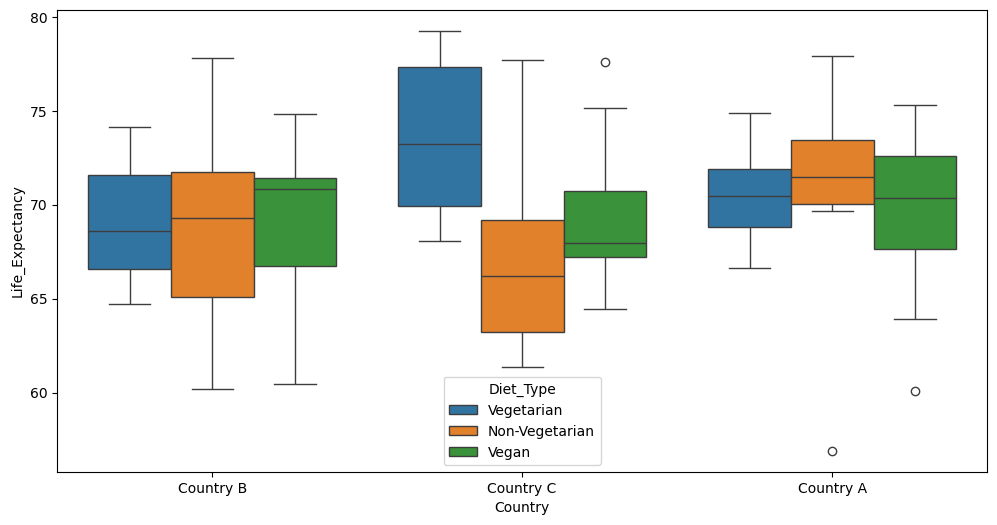

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='Country',
    y='Life_Expectancy',
    hue='Diet_Type'
)

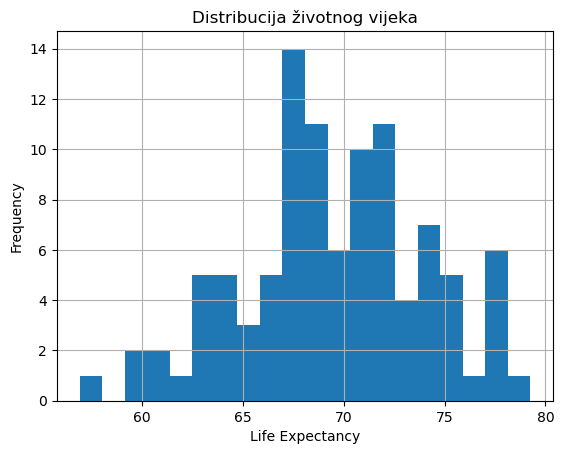

In [32]:
df['Life_Expectancy'].hist(bins=20)
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Distribucija životnog vijeka')
plt.show()

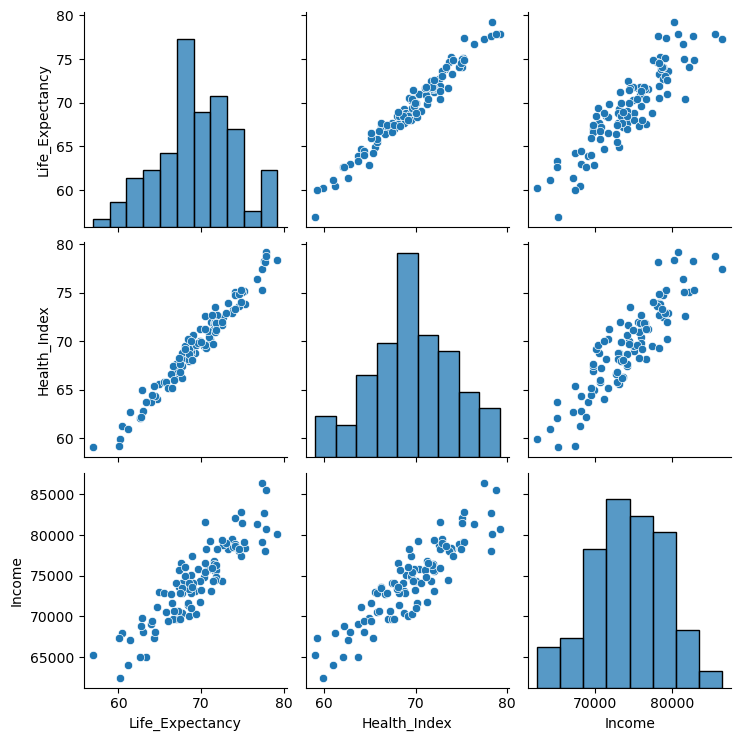

In [34]:
sns.pairplot(df[["Life_Expectancy", "Health_Index", "Income"]])